In [49]:
%matplotlib inline
import numpy as np
import sklearn as skl

In [50]:
train_path = 'mnist'
test_path = 'mnist.t'
data_dim = 784

def reader(path):
    data_img = []
    data_label = []
    with open(str(path),'r') as FP:
        for line in FP:
            segment = line.split(' ')
            label = segment[0]
            img = np.zeros(data_dim, dtype=np.float32)
            for v in segment[1:]:
                index, value = v.split(':')
                img[int(index)] = float(value) / 255.
            data_img.append(img)
            data_label.append(int(label))
    return np.array(data_img), np.array(data_label)



In [51]:
training_img, training_label = reader(train_path)
testing_img, testing_label = reader(test_path)
print len(training_img)
print len(testing_img)

60000
10000


In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
reduced_train_img = pca.fit_transform(training_img)
print 'Information left: ', np.sum(pca.explained_variance_ratio_)

Information left:  0.64358


In [53]:
from sklearn.svm import SVC
clf = SVC(verbose=True)
%time clf.fit(reduced_train_img, training_label)


[LibSVM]CPU times: user 33.6 s, sys: 469 ms, total: 34 s
Wall time: 35.3 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [54]:
reduced_testing_img = pca.transform(testing_img)
mean_score_on_testing_set = clf.score(reduced_testing_img, testing_label)
print 'score on testing set:', mean_score_on_testing_set

score on testing set: 0.9802


In [55]:
predicted = clf.predict(reduced_testing_img)
confusion_metrix = skl.metrics.confusion_matrix(testing_label, predicted)
print confusion_metrix
inclass_precision = skl.metrics.classification_report(testing_label, predicted)
print inclass_precision

[[ 972    0    1    1    0    2    2    1    1    0]
 [   0 1129    2    2    0    0    0    0    1    1]
 [   2    0 1014    2    1    1    0    8    4    0]
 [   0    0    2  996    0    3    0    6    2    1]
 [   0    0    2    0  962    0    2    0    1   15]
 [   2    0    0   10    1  870    2    1    5    1]
 [   5    3    1    0    4    2  941    0    2    0]
 [   0    4    9    0    2    0    0 1000    1   12]
 [   2    0    2    4    4    4    1    2  953    2]
 [   2    5    0    5   15    3    1   10    3  965]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.98      0.98      1032
          3       0.98      0.99      0.98      1010
          4       0.97      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.99       958
          7       0.97      0.97      0.97  

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

def plot_embedding(x_emb,y,n,title=''):
    cmap = plt.cm.gist_ncar_r
    ax = plt.subplot()
    for l in xrange(n):
        points = x_emb[y==l,:]
        ax.scatter(points[:,0], points[:,1], label=l, c=cmap(float(l)/float(n)))
    ax.legend(loc='lower right', frameon=True, prop={'size': 10})
    ax.set_title(title)
    plt.show()

In [120]:
from sklearn.manifold import TSNE as tSNE

tsne = tSNE(n_components=2)
emb_testing_img = tsne.fit_transform(testing_img)

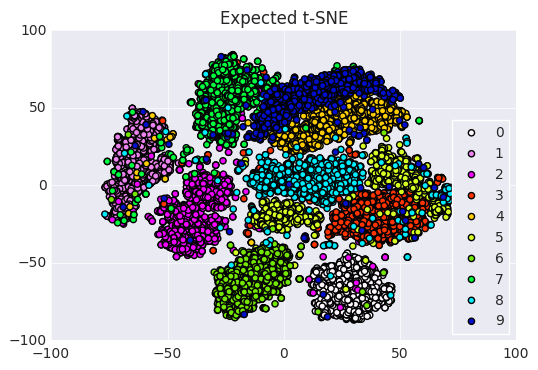

In [146]:
plot_embedding(emb_testing_img, testing_label, 10, 'Expected t-SNE')

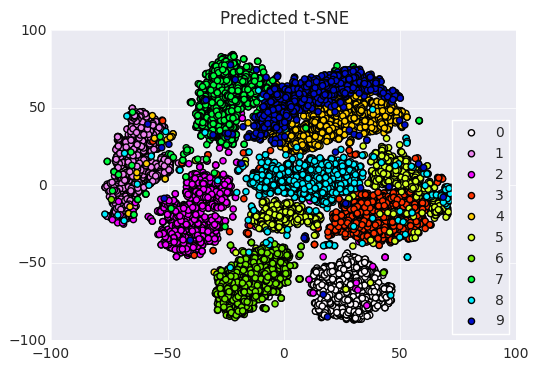

In [147]:
plot_embedding(emb_testing_img, predicted, 10, 'Predicted t-SNE')